In [1]:
# Add Magic Command
%matplotlib inline

# Add dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data from csv files and stores it in a DataFrame
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
# Merging the two DataFrames into one workable 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left',  on=['city','city'])

In [4]:
# Summary Data 
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
average_fare_per_ride = total_fares / total_rides
average_fare_per_driver = total_fares / total_drivers

final_summary = pd.DataFrame({"Total Rides": total_rides, "Total Drivers": total_drivers, "Total Fares": total_fares, "Average Fare per Ride": average_fare_per_ride, "Average Fare per Driver": average_fare_per_driver})
final_summary['Total Rides'] = final_summary['Total Rides'].map("{:,}".format)
final_summary['Total Drivers'] = final_summary['Total Drivers'].map("{:,}".format)
final_summary['Total Fares'] = final_summary['Total Fares'].map("${:,.2f}".format)
final_summary['Average Fare per Ride'] = final_summary['Average Fare per Ride'].map("${:,.2f}".format)
final_summary['Average Fare per Driver'] = final_summary['Average Fare per Driver'].map("${:,.2f}".format)
final_summary.index.name = None
final_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [5]:
# Rename Columns in merged DataFrame

new_column_names = ["City", "Date", "Fare", "Ride Id", "No. Drivers", "City Type"]

pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df['Date'] = pd.to_datetime(pyber_data_df['Date']).dt.date

In [6]:
# Copying specifc columns from merged DataFrame into new Dataframe
fare_data_df = pyber_data_df[['Date', 'City Type', 'Fare']].copy(deep=True).set_index(['Date'])

In [7]:
# Checking new dataFrame index type
fare_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 to 2019-04-25
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [8]:
# Finding total fares for each city type grouped by date
total_fares = fare_data_df.groupby(['City Type','Date']).sum()

In [9]:
# reseting total_fares index
total_fares = total_fares.reset_index()

In [10]:
# Creates a picot table
pivot_table_fares = pd.pivot_table(total_fares, values='Fare',index='Date', columns=['City Type'])

In [11]:
# selecting range of dates to be selected from pivot table
startdate = pd.to_datetime("2019-01-01").date()
enddate = pd.to_datetime("2019-04-29").date()
fare_pivot_df = pivot_table_fares.loc[startdate:enddate]

In [13]:
# formating and creating new DataFrame from adjusted pivot table
fare_pivot_df = fare_pivot_df.reset_index()
fare_pivot_df['Date'] = pd.to_datetime(fare_pivot_df['Date'])

fare_df = fare_pivot_df.resample('W-MON',on='Date').sum()

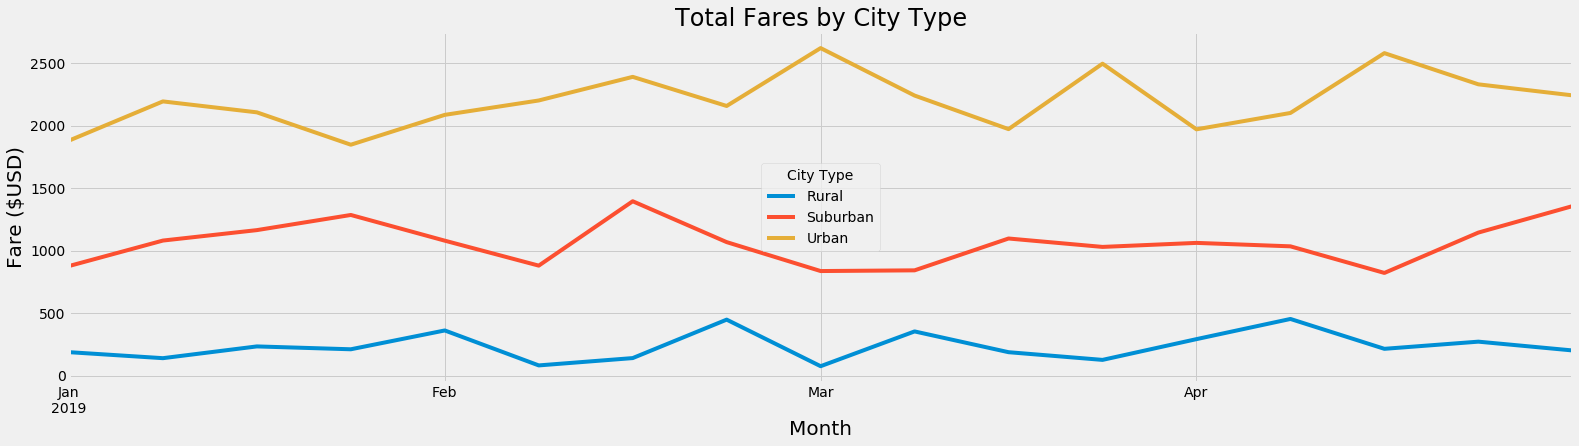

In [14]:
# Creates multi line graph 
plt.style.use('fivethirtyeight')
fare_df.plot(figsize=(24,6))
plt.title('Total Fares by City Type', fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Fare ($USD)', fontsize=20)
plt.savefig("analysis/Fig8.png")
plt.show()